# Bank Customer Churn.

# Imports 

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sn
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras import ops
from keras import layers 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
import joblib


%matplotlib inline

2025-12-22 19:42:56.405051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Uploading Data

In [37]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7319,7320,15762045,Gilchrist,474,Germany,Female,37,5,142688.57,2,1,1,110953.33,0
5956,5957,15594928,Pagnotto,798,Germany,Female,38,4,129055.13,1,1,0,157147.59,0
1123,1124,15596800,Hill,779,Germany,Male,33,1,158456.76,1,1,1,197000.92,1
9067,9068,15684645,Ajuluchukwu,704,Germany,Male,41,9,62078.21,2,1,0,129050.67,0
2383,2384,15642468,Clark,697,France,Male,42,9,132739.26,2,0,0,174667.65,0


In [38]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)


In [39]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6973,659,Germany,Male,39,8,106259.63,2,1,1,198103.32,0
9133,705,Spain,Male,36,1,111629.29,1,1,1,21807.16,0
5848,758,Germany,Male,33,0,129142.54,2,1,1,26606.28,0
2163,605,France,Male,35,6,0.00,2,1,1,45206.57,0
5386,642,France,Male,48,9,118317.27,4,0,0,78702.98,1


## Exploring Data.

In [40]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [41]:
df.shape


(10000, 11)

In [42]:
print(df.columns.tolist()) 

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [43]:
df.dtypes 

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [44]:
df.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [45]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
 df.Gender.head(10)

0    Female
1    Female
2    Female
3    Female
4    Female
5      Male
6      Male
7    Female
8      Male
9      Male
Name: Gender, dtype: object

In [47]:
 df.Age.head(10)

0    42
1    41
2    42
3    39
4    43
5    44
6    50
7    29
8    44
9    27
Name: Age, dtype: int64

# Converting Columns Into Numbers. 

## Convert Gender → Numeric

In [48]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [49]:
df.shape 

(10000, 11)

In [50]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3605,588,Germany,0,34,10,129417.82,1,1,0,153727.32,0
9018,663,France,1,67,9,0.00,3,1,1,72318.77,0
5683,615,France,0,61,1,104267.70,1,1,0,62845.64,1
8035,577,France,0,30,8,92472.10,2,0,1,126434.61,0
2005,785,Germany,0,32,3,124493.03,2,0,1,52583.79,1


## Convert Geography→ Numeric
#### get_dummies: Because machine learning models cannot understand text, so we must convert it into numbers.

# Creationg df1

In [51]:
df1 = pd.get_dummies(df, columns=['Geography'], dtype=int)


In [52]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Visulization Charts.
##  Histogram (Tenure vs Churn)

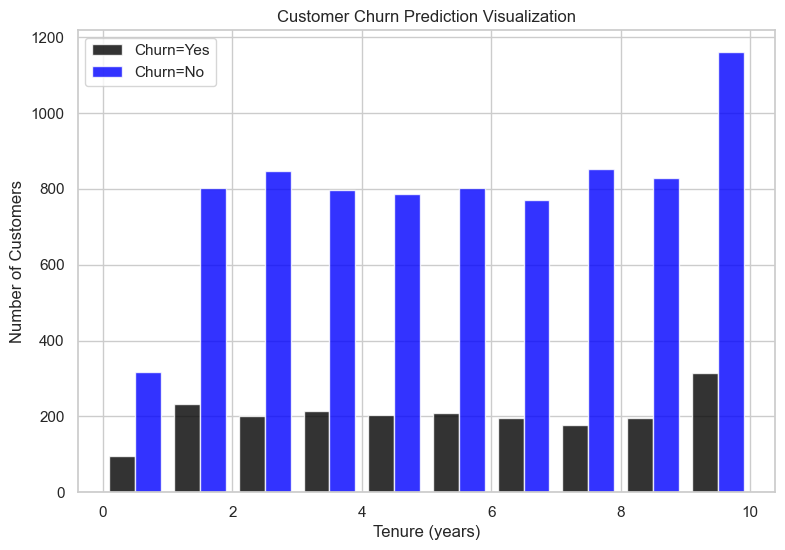

In [53]:
churn_yes = df1[df1.Exited == 1].Tenure
churn_no  = df1[df1.Exited == 0].Tenure

# Plot histogram
plt.figure(figsize=(9,6))
plt.hist([churn_yes, churn_no],
         bins=10,                 
         color=['black','blue'],
         label=['Churn=Yes','Churn=No'],
         alpha=0.8)

# Labels and title
plt.xlabel("Tenure (years)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()
plt.show()


#  Countplot (Churn distribution)

/var/folders/c6/8q02d72n1zdch15053xpb1hw0000gn/T/ipykernel_10882/4280390814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df1, palette=['green','red'])


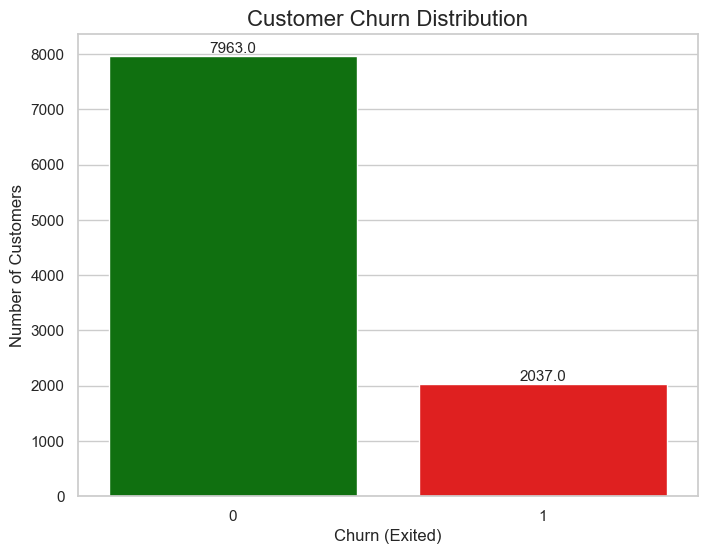

In [54]:
sns.set(style="whitegrid")

# Count of churn vs non-churn
plt.figure(figsize=(8,6))
sns.countplot(x='Exited', data=df1, palette=['green','red'])

# Labels and title
plt.xlabel("Churn (Exited)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.title("Customer Churn Distribution", fontsize=16)

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom', fontsize=11)

plt.show()


# Scatter plot (Age vs Balance)

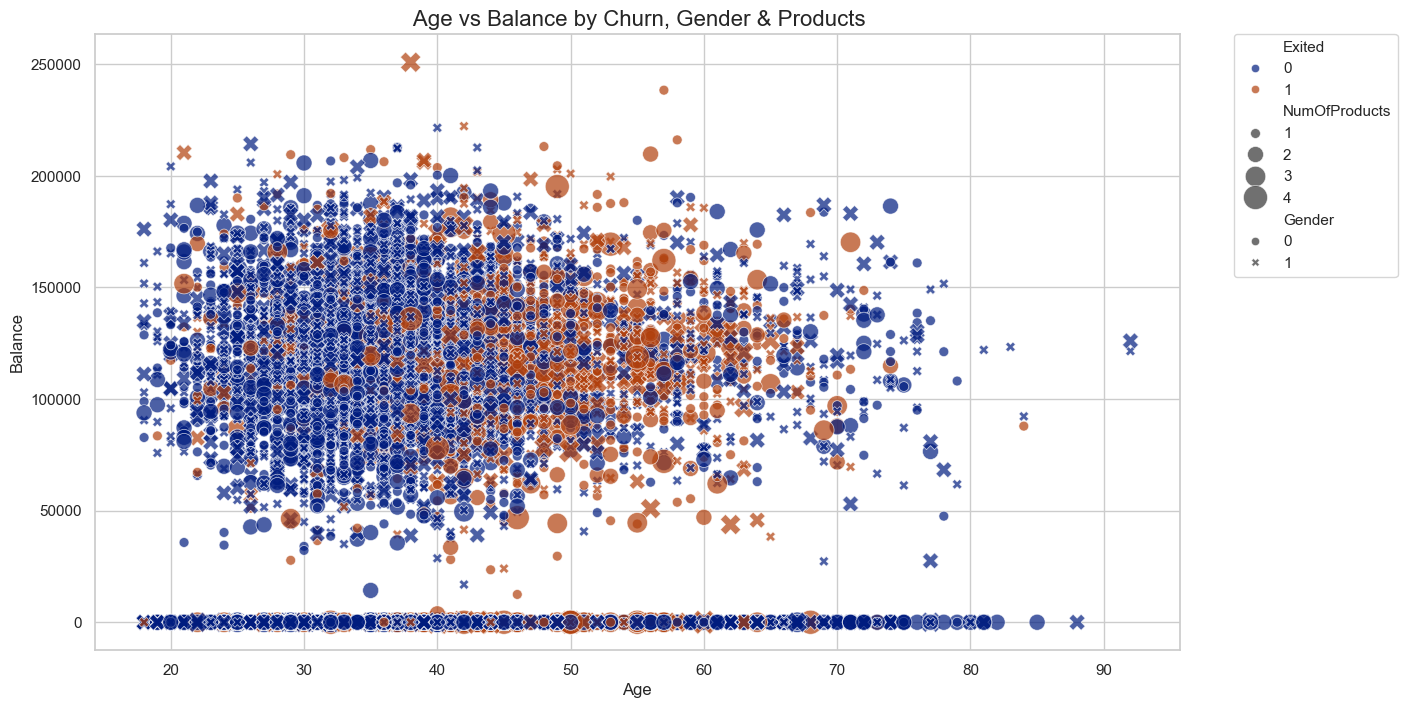

In [55]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14,8))

# Scatter plot: Age vs Balance
sns.scatterplot(
    data=df1,
    x='Age', 
    y='Balance', 
    hue='Exited',          # churned or not
    style='Gender',        # male/female
    size='NumOfProducts',  # product usage
    palette='dark',
    sizes=(50, 300),
    alpha=0.7
)

# Add title and labels
plt.title(" Age vs Balance by Churn, Gender & Products", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Model

In [56]:
df_model = df1.copy()


In [57]:
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

In [58]:
X_train, X_test, y_train , y_test = train_test_split(
    X,y, test_size=0.2, random_state=5
)

In [59]:
X_train.shape

(8000, 12)

In [60]:
X_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7054,769,1,38,6,0.00,2,0,0,104393.78,0,0,1
442,534,0,34,7,121551.58,2,1,1,70179.00,1,0,0
3954,729,0,34,9,132121.71,1,0,1,105409.31,1,0,0
2288,619,0,30,7,70729.17,1,1,1,160948.87,1,0,0
3196,610,1,36,4,129440.30,2,1,0,102638.35,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6133,667,0,33,4,127076.68,2,1,0,69011.66,0,1,0
532,729,1,32,6,93694.42,1,1,1,79919.13,1,0,0
1370,769,0,26,7,0.00,2,1,0,176843.53,1,0,0
6514,563,1,26,7,0.00,2,0,0,6139.74,0,0,1


In [61]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,750,0,39,6,0.00,2,0,0,19264.33,0,0,1
4154,726,1,34,3,0.00,2,1,0,196288.46,1,0,0
3881,588,0,64,3,0.00,1,1,1,189703.65,1,0,0
9238,773,0,50,4,0.00,2,1,0,129372.94,1,0,0
5210,551,1,35,7,129717.30,2,0,0,86937.20,1,0,0
7487,651,0,56,4,0.00,1,0,0,84383.22,1,0,0
7542,507,0,34,4,0.00,2,1,1,60688.38,0,0,1
7524,660,0,40,8,167181.01,1,1,1,185156.94,1,0,0
9412,725,1,26,6,98684.15,1,0,0,133720.57,1,0,0
6377,692,1,33,9,0.00,1,1,0,113505.93,1,0,0


In [62]:
len(X_train.columns)

12

In [76]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

class_weights = {0: 1, 1: 2}

# Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights
)



Epoch 1/50


/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7765 - loss: 0.7542 - val_accuracy: 0.7731 - val_loss: 0.5088
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7800 - loss: 0.6895 - val_accuracy: 0.7937 - val_loss: 0.4748
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.6635 - val_accuracy: 0.7881 - val_loss: 0.4693
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7875 - loss: 0.6582 - val_accuracy: 0.7825 - val_loss: 0.4688
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7847 - loss: 0.6446 - val_accuracy: 0.7862 - val_loss: 0.4603
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7982 - loss: 0.6381 - val_accuracy: 0.7825 - val_loss: 0.4706
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7931 - loss: 0.6305 - val_accuracy: 0.7981 - val_loss: 0.4343
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - loss: 0.6343 - val_accuracy: 0.8012 - val_

In [77]:
y_prob = model.predict(X_test_scaled)
y_pred = (y_prob > 0.45).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[1400  195]
 [ 149  256]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1595
           1       0.57      0.63      0.60       405

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000



In [78]:
y_pred = (y_prob > 0.5).astype(int)


In [79]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.839
Confusion Matrix:
 [[1440  155]
 [ 167  238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1595
           1       0.61      0.59      0.60       405

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



# confusion matrix 

Text(92.25, 0.5, 'Truth')

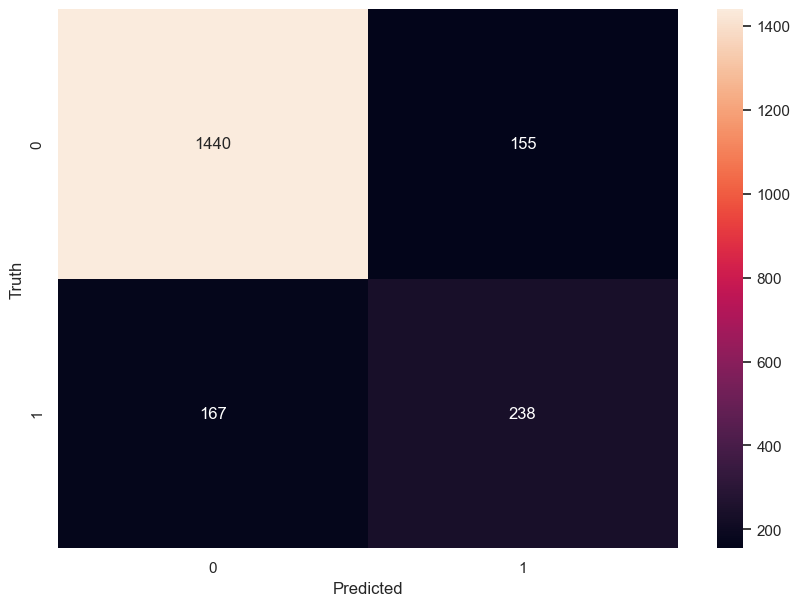

In [83]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Accuracy model 

In [84]:
round((1440+238)/ (1440+238+155+167),2)

0.84

# precision for 0 class i.e Prediction for customer who didnot churn.

In [89]:
round(1440 / (1440 + 155), 2)


0.9

# precision for 1 class i.e Prediction for customer who didnot churn.

In [90]:
round(238 / (238 + 155), 2)


0.61

# recall for 0 

In [91]:
round(1440 / (1440 + 167), 2)


0.9

# completed 